In [ ]:
# run this every session

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.ticker as ticker
import seaborn as sns
from collections import Counter
from statsmodels.regression.linear_model import OLS
import statsmodels.formula.api as smf  # Import the formula api as smf or similar
from scipy.stats import kstest
import textwrap

In [ ]:
# import 2014 - 2023 data
df_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scopus Downloads/scopus_2014 - 23_analyse.csv')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122893 entries, 0 to 122892
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        122893 non-null  object
 1   Authors with affiliations  122893 non-null  object
 2   Year                       122893 non-null  int64 
 3   DOI                        110074 non-null  object
 4   Document Type              122893 non-null  object
 5   Open Access                58743 non-null   object
 6   Discipline                 120672 non-null  object
 7   Countries involved         122893 non-null  object
 8   Region                     122893 non-null  object
 9   Collaboration Type         122893 non-null  object
 10  Institutions involved      122893 non-null  object
 11  OECD Class                 120672 non-null  object
dtypes: int64(1), object(11)
memory usage: 11.3+ MB


In [ ]:
df_main.sample(1)

,EID,Authors with affiliations,Year,DOI,Document Type,Open Access,Discipline,Countries involved,Region,Collaboration Type,Institutions involved,OECD Class
20762,2-s2.0-85019394433,"Abaraogu U.O., School of Health and Life Scien...",2017,10.1016/j.ejvs.2017.04.003,Review,All Open Access; Bronze Open Access,Medicine,"['Nigeria', 'United Kingdom']","['Outside Africa', 'Africa']",International,['university of nigeria'],Medical and health sciences


**Entire Data Trend**

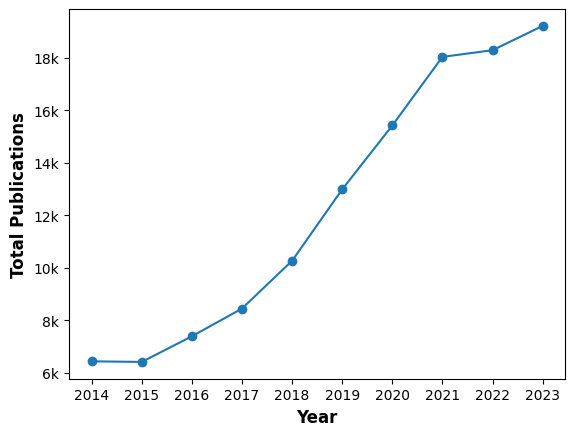

In [ ]:
# Group the total publication by year and visualize on a line chart
ax = df_main.groupby('Year').size().plot(kind='line', marker='o')

# Set x-axis labels to show each year
ax.set_xticks(df_main['Year'].unique())  # Use unique years as ticks
ax.set_xticklabels(df_main['Year'].unique())  # Set labels to the years

# Format y-axis labels to 'k'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Set the title and labels
# plt.title('Total Publications by Year')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Publications', fontsize=12, fontweight='bold')

plt.show()  # Display the chart

In [ ]:
df_main.groupby('Year')['EID'].size().reset_index(name='Publication Count')

,Year,Publication Count
0,2014,6442
1,2015,6419
2,2016,7395
3,2017,8450
4,2018,10269
5,2019,12986
6,2020,15417
7,2021,18027
8,2022,18282
9,2023,19206


In [ ]:
# define publications per year
publications_per_year = df_main.groupby('Year').size().reset_index(name='Publication Count')

overall_growth = (publications_per_year['Publication Count'].iloc[-1] - publications_per_year['Publication Count'].iloc[0]) / publications_per_year['Publication Count'].iloc[0] * 100
print(f"Overall growth rate from 2014 to 2023: {overall_growth:.2f}%")

Overall growth rate from 2014 to 2023: 198.14%


In [ ]:
# Retrieve publication counts for the first and last years
FY = publications_per_year.loc[publications_per_year['Year'] == 2014, 'Publication Count'].values[0]
LY = publications_per_year.loc[publications_per_year['Year'] == 2023, 'Publication Count'].values[0]

# Calculate CAGR
n = 10  # Number of years
CAGR = ((LY / FY)**(1/n) - 1) * 100

# Print the result
print(f"The Compound Annual Growth Rate (CAGR) is: {CAGR:.2f}%")

The Compound Annual Growth Rate (CAGR) is: 11.54%


> **Counting number of Countries**



In [ ]:
df_main['Countries involved'] = df_main['Countries involved'].apply(
    lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x
)

# Flatten the list of countries and convert to proper case
all_countries = [country.title() for sublist in df_main['Countries involved'] if isinstance(sublist, list) for country in sublist]

country_counts = Counter(all_countries)

df_country_counts = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
print(df_country_counts)

                            Country   Count
0                           Nigeria  122883
1                     United States   11603
2                             Egypt    1845
3                            Mexico    1138
4                             India    5885
..                              ...     ...
154                      Kyrgyzstan      92
155              Dominican Republic      36
156                       Swaziland     118
157                         Armenia      59
158  Federated States Of Micronesia      32

[159 rows x 2 columns]


In [ ]:
# how many countries were involved by counting the unique countries
print(f"Total number of countries involved: {len(country_counts)}")


Total number of countries involved: 159


The above representation confirms the accuracy of the country extraction algorithm since the

In [ ]:
# print list of all country and publication count
for country, count in country_counts.items():
    print(f"{country}, {count}")

Nigeria, 122883
United States, 11603
Egypt, 1845
Mexico, 1138
India, 5885
Japan, 1697
Malaysia, 8734
South Africa, 13519
Thailand, 1626
Pakistan, 2175
United Kingdom, 10609
Cameroon, 1154
China, 5473
Sweden, 1178
Norway, 900
Serbia, 798
Spain, 1443
Saudi Arabia, 2974
Australia, 3017
Italy, 2193
Canada, 3102
Cote D'Ivoire, 370
Colombia, 735
Iraq, 805
Tunisia, 389
Iran, 1300
Portugal, 988
Germany, 3214
Belgium, 1115
Mozambique, 357
Turkey, 1981
Palestine, 169
Burkina Faso, 452
Senegal, 472
Uganda, 1593
Austria, 647
Finland, 660
Denmark, 624
Algeria, 360
Ghana, 2522
Congo, 388
Slovenia, 190
Nepal, 367
Switzerland, 1521
Peru, 472
Israel, 546
Netherlands, 1667
Poland, 864
France, 1851
Lebanon, 460
New Zealand, 816
Brazil, 2009
Romania, 643
Bulgaria, 303
Russian Federation, 992
South Korea, 1063
Cyprus, 506
Indonesia, 1057
Singapore, 491
Madagascar, 114
Zambia, 511
Ethiopia, 1281
Kenya, 2175
Gambia, 431
Zimbabwe, 417
Oman, 374
Botswana, 438
Niger, 186
Tanzania, 1012
Slovakia, 236
Philippines

In [ ]:
# Exclude Nigeria from the country counts
country_counts_excluding_nigeria = {country: count for country, count in country_counts.items() if 'Nigeria' not in country}

# Get the top 20 most frequent countries (excluding Nigeria)
top_20_countries = Counter(country_counts_excluding_nigeria).most_common(20)

# Extract countries and counts for plotting
countries, counts = zip(*reversed(top_20_countries))

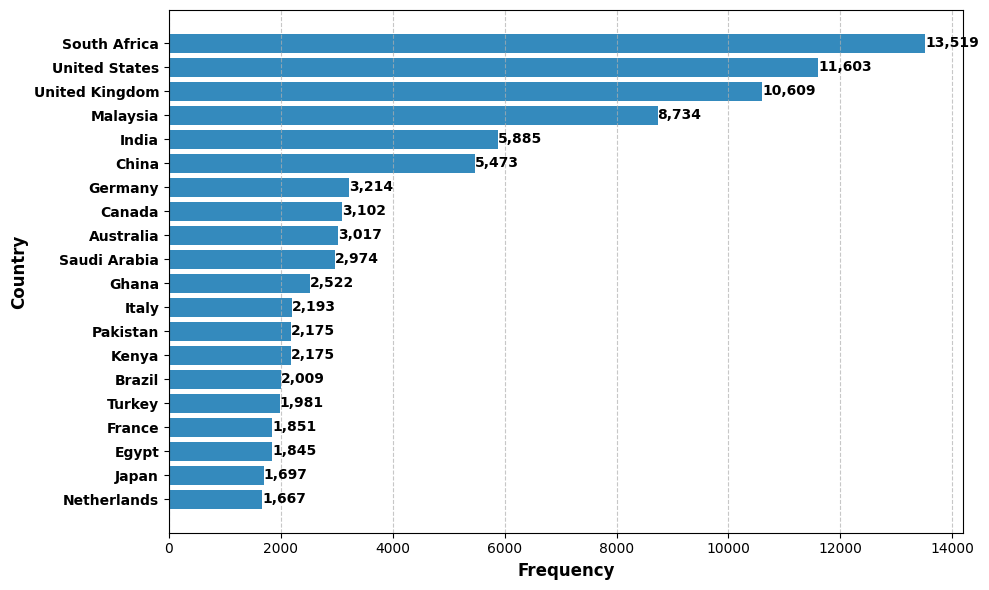

In [ ]:
# Create a horizontal bar chart with a more professional look
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.barh(countries, counts, color='#348ABD')  # Use a custom color
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
# plt.title('Top 20 Most Frequent Countries in Collaborations (Descending)', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a subtle grid

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Display the count on each bar
for i, v in enumerate(counts):
    plt.text(v + 0.5, i, f'{v:,}', color='black', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Objective 1:**	To quantify the number of publications produced by researchers in Nigeria over a ten-year period (2014-2023) and identify any trends in research production.

In [ ]:
# Total publications affiliated to researcher in Nigeria within this period using an horizontal bar chart
df_mainNg = df_main[df_main['Countries involved'].apply(lambda x: 'Nigeria' in x)]

In [ ]:
df_mainNg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122871 entries, 0 to 122892
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        122871 non-null  object
 1   Authors with affiliations  122871 non-null  object
 2   Year                       122871 non-null  int64 
 3   DOI                        110052 non-null  object
 4   Document Type              122871 non-null  object
 5   Open Access                58723 non-null   object
 6   Discipline                 120650 non-null  object
 7   Countries involved         122871 non-null  object
 8   Region                     122871 non-null  object
 9   Collaboration Type         122871 non-null  object
 10  Institutions involved      122871 non-null  object
 11  OECD Class                 120650 non-null  object
dtypes: int64(1), object(11)
memory usage: 12.2+ MB


<Axes: xlabel='Year'>

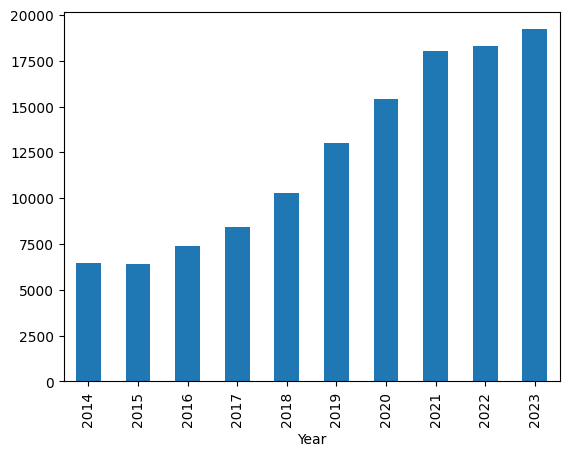

In [ ]:
publications_per_yearNg = df_mainNg.groupby('Year').size().reset_index(name='Publication Count')

df_mainNg.groupby('Year').size().plot(kind='bar')

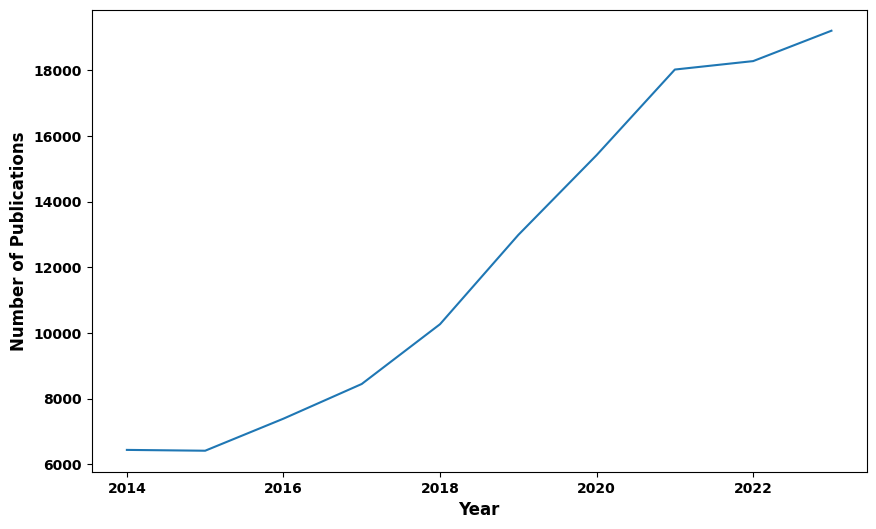

In [ ]:
# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=publications_per_yearNg, x='Year', y='Publication Count')
plt.xlabel('Year', fontsize = '12', fontweight='bold')
plt.ylabel('Number of Publications', fontsize = '12', fontweight='bold')
# plt.title('Trend of Publications Over Time')

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')


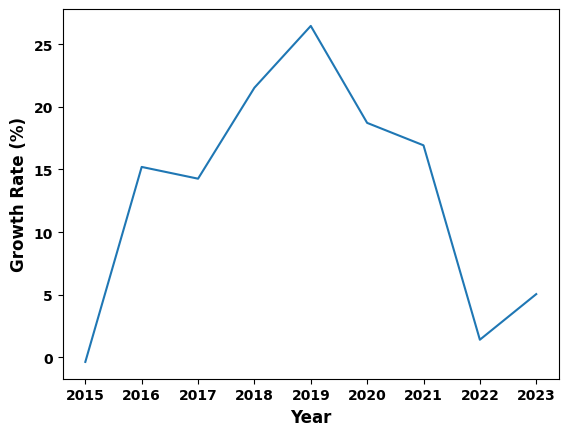

In [ ]:
# Calculate year-on-year growth rate
yearly_growth = publications_per_year['Publication Count'].pct_change() * 100
publications_per_year['Growth Rate'] = yearly_growth

# Visualize the growth rate
plt.plot(publications_per_year['Year'], publications_per_year['Growth Rate'])
plt.xlabel('Year', fontsize = '12', fontweight='bold')
plt.ylabel('Growth Rate (%)', fontsize = '12', fontweight='bold')
# plt.title('Year-on-Year Growth Rate of Publications')

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()

In [ ]:
print(publications_per_year[['Year', 'Publication Count', 'Growth Rate']])

   Year  Publication Count  Growth Rate
0  2014               6442          NaN
1  2015               6419    -0.357032
2  2016               7395    15.204861
3  2017               8450    14.266396
4  2018              10269    21.526627
5  2019              12986    26.458272
6  2020              15417    18.720160
7  2021              18027    16.929364
8  2022              18282     1.414545
9  2023              19206     5.054152


**Objective 2**: How well does collaboration with other researchers, both within Nigeria and internationally, affects the research productivity of Nigerian scholars?

In [ ]:
# Group by collaboration type and calculate counts
collaboration_counts = df_mainNg.groupby('Collaboration Type').size().reset_index(name='Count')

# Calculate percentage for each collaboration type
collaboration_counts['Percentage'] = round((collaboration_counts['Count'] / collaboration_counts['Count'].sum()) * 100)

# Display the updated DataFrame
collaboration_counts.sort_values(by='Percentage', ascending=False)

,Collaboration Type,Count,Percentage
1,Local,64360,52.0
0,International,47273,38.0
2,Regional,11238,9.0


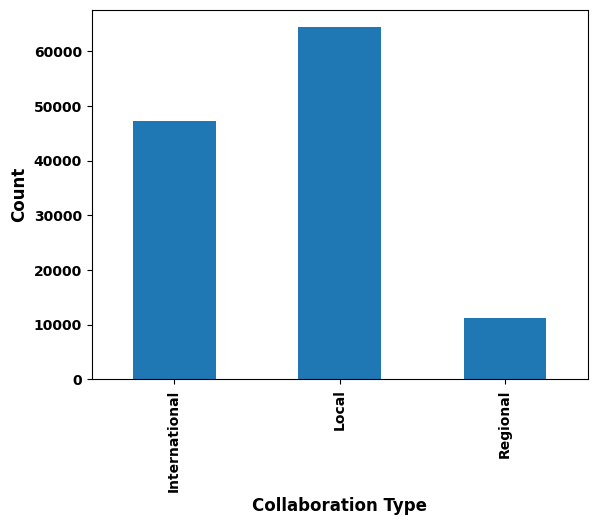

In [ ]:
df_mainNg.groupby('Collaboration Type').size().plot(kind='bar')
plt.xlabel('Collaboration Type', fontsize = '12', fontweight='bold')
plt.ylabel('Count', fontsize = '12', fontweight='bold')
# plt.title('Distribution of Collaboration Types')

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()

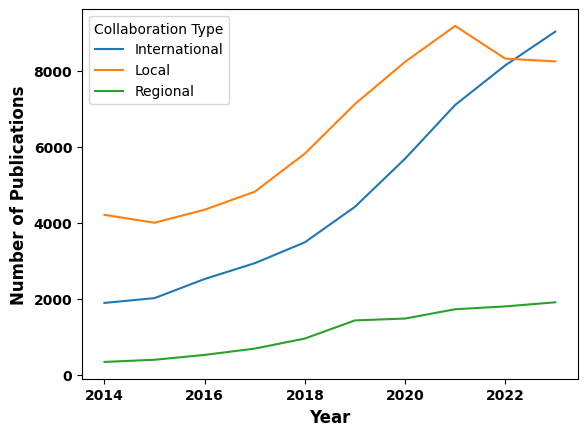

In [ ]:
# Group by year and collaboration type
publications_by_collaboration = df_mainNg.groupby(['Year', 'Collaboration Type'])['EID'].count().reset_index(name='Publication Count')

# Visualize the trend
sns.lineplot(data=publications_by_collaboration, x='Year', y='Publication Count', hue='Collaboration Type')
plt.xlabel('Year', fontsize = '12', fontweight='bold')
plt.ylabel('Number of Publications', fontsize = '12', fontweight='bold')
# plt.title('Number of Publications Involving Nigeria by Collaboration Type')

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()

**Objective:3.** To compare the research productivity of different universities and research institutions in Nigeria, identifying high-performing institutions, their features, and potential best practices.

First, we enumerate the number of participating institutions and found 236 institutions.

In [ ]:
df_mainNg = df_mainNg.copy()

# ensure the column has the right dtype
df_mainNg['Institutions involved'] = df_mainNg['Institutions involved'].apply(eval)

# Explode the 'Institutions' column
exploded_institutions = df_mainNg.explode('Institutions involved')

# Get the number of unique institutions
num_unique_institutions = exploded_institutions['Institutions involved'].nunique()

# Print the result
print(num_unique_institutions)

236


In [ ]:
# display the publication count by institution in a table sorted in descending order
df_inst = df_mainNg.explode('Institutions involved').groupby('Institutions involved')['EID'].count().reset_index(name='Publication Count')
df_inst = df_inst.sort_values(by='Publication Count', ascending=False)
df_inst.head(10)

,Institutions involved,Publication Count
217,university of ibadan,13122
224,university of nigeria,13078
49,covenant university,7799
221,university of lagos,6843
171,obafemi awolowo university,6772
219,university of ilorin,6344
10,ahmadu bello university,5320
82,"federal university of technology, akure",4131
31,bayero university,3912
214,university of benin,3562


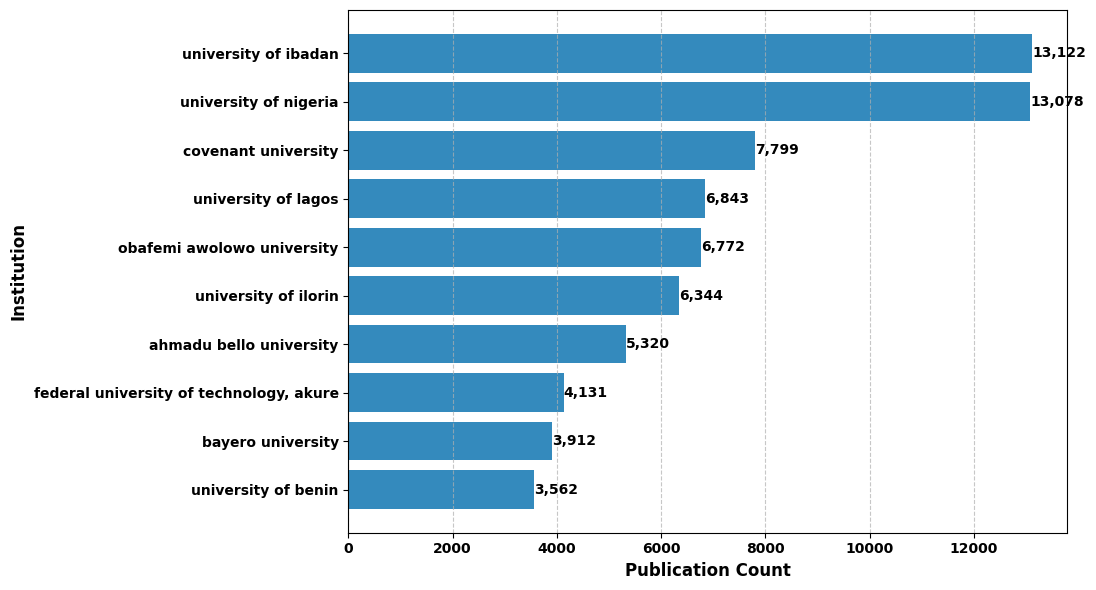

In [ ]:
# Sort by publication count and get top 10
top_10_institutions = df_inst.sort_values(by='Publication Count', ascending=True).tail(10)

# Visualize top 10 institutions
plt.figure(figsize=(11, 6))
plt.barh(top_10_institutions['Institutions involved'], top_10_institutions['Publication Count'], color='#348ABD')
plt.xlabel('Publication Count', fontsize=12, fontweight='bold')
plt.ylabel('Institution', fontsize=12, fontweight='bold')
# plt.title('Top 10 Institutions with the Most Publications', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Display the count on each bar
for i, v in enumerate(top_10_institutions['Publication Count']):
    plt.text(v + 0.5, i, f'{v:,}', color='black', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 217 to 235
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Institutions involved  236 non-null    object
 1   Publication Count      236 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [ ]:
# df_main['Institutions involved'] = df_main['Institutions involved'].astype(str)

# Replace NaN or floats in top_10_institutions
top_10_institutions['Institutions involved'] = top_10_institutions['Institutions involved'].fillna('Unknown').astype(str)

# Filter data for top 10 institutions
df_top_inst = df_mainNg[df_mainNg['Institutions involved'].apply(lambda x: any(i in x for i in top_10_institutions['Institutions involved']))].explode('Institutions involved')
df_top_inst = df_top_inst[df_top_inst['Institutions involved'].isin(top_10_institutions['Institutions involved'])]

# Group by institution and year, then count publications
publications_by_year = df_top_inst.groupby(['Institutions involved', 'Year'])['EID'].count().reset_index(name='Publication Count')

# Calculate total publication count for each institution (using 'Institutions involved' column)
institution_counts = publications_by_year.groupby('Institutions involved')['Publication Count'].sum().sort_values(ascending=False).index

In [ ]:
# Create the wide table using pivot_table
publication_by_inst_by_year = publications_by_year.pivot_table(
    index='Institutions involved',
    columns='Year',
    values='Publication Count',
    fill_value=0  # Fill missing values with 0
)

# For publication_by_inst_by_year table:
publication_by_inst_by_year['Total'] = publication_by_inst_by_year.sum(axis=1)  # Add 'Total' column
publication_by_inst_by_year = publication_by_inst_by_year.sort_values(by=['Total'], ascending=False)  # Sort by 'Total'

# Display the table
publication_by_inst_by_year

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Institutions involved,,,,,,,,,,,
university of ibadan,807.0,804.0,958.0,1046.0,1163.0,1286.0,1660.0,1903.0,1730.0,1765.0,13122.0
university of nigeria,566.0,589.0,667.0,754.0,924.0,1380.0,1703.0,2113.0,2156.0,2226.0,13078.0
covenant university,229.0,322.0,447.0,618.0,1206.0,1506.0,988.0,1053.0,873.0,557.0,7799.0
university of lagos,376.0,404.0,416.0,523.0,667.0,690.0,841.0,947.0,992.0,987.0,6843.0
obafemi awolowo university,411.0,424.0,489.0,616.0,620.0,663.0,791.0,896.0,926.0,936.0,6772.0
university of ilorin,333.0,278.0,318.0,433.0,522.0,649.0,821.0,971.0,1035.0,984.0,6344.0
ahmadu bello university,305.0,299.0,317.0,344.0,422.0,565.0,637.0,755.0,793.0,883.0,5320.0
"federal university of technology, akure",177.0,176.0,235.0,296.0,403.0,481.0,528.0,684.0,602.0,549.0,4131.0
bayero university,146.0,198.0,195.0,219.0,311.0,431.0,511.0,678.0,611.0,612.0,3912.0


In [ ]:
# apply function
cagr_per_institution = publications_by_year.groupby('Institutions involved').apply(calculate_cagr).reset_index(name='CAGR')

# Format CAGR as percentage for cagr_per_institution
cagr_per_institution['CAGR'] = cagr_per_institution['CAGR'].map('{:.2%}'.format)

# Sort by CAGR in descending order
cagr_per_institution = cagr_per_institution.sort_values(by=['CAGR'], ascending=False)

cagr_per_institution

<ipython-input-86-0f9fcd10ed79>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr_per_institution = publications_by_year.groupby('Institutions involved').apply(calculate_cagr).reset_index(name='CAGR')


,Institutions involved,CAGR
4,obafemi awolowo university,9.58%
6,university of ibadan,9.08%
5,university of benin,7.07%
1,bayero university,17.26%
9,university of nigeria,16.43%
3,"federal university of technology, akure",13.40%
7,university of ilorin,12.79%
0,ahmadu bello university,12.54%
8,university of lagos,11.32%
2,covenant university,10.38%


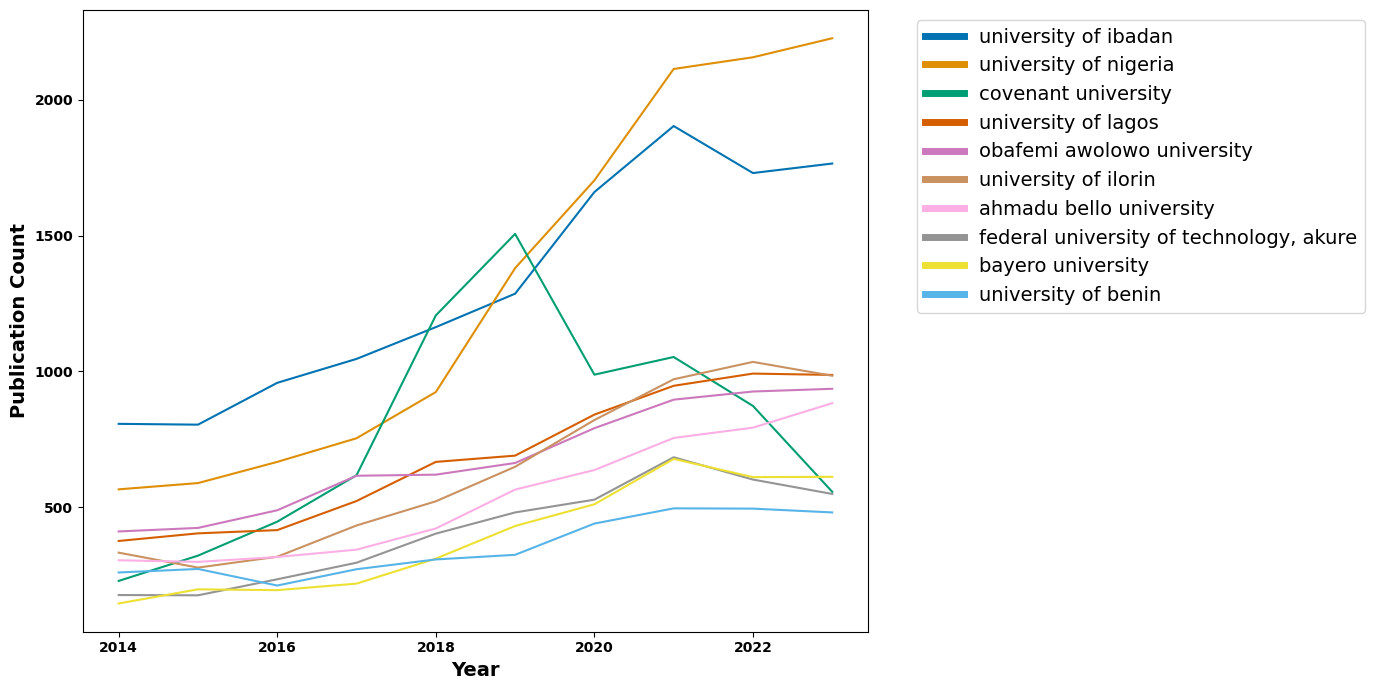

In [ ]:
# Create hue_order based on total publication count
hue_order = institution_counts.tolist()

# Visualize publication trend with sorted legend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Publication Count', hue='Institutions involved', hue_order=hue_order, data=publications_by_year, palette="colorblind")
# plt.title('Publication Trend of Top 10 Institutions', fontsize=16)  # Increase title font size (optional)
plt.xlabel('Year', fontsize=14, fontweight='bold')  # Increase x-axis label font size
plt.ylabel('Publication Count', fontsize=14, fontweight='bold')  # Increase y-axis label font size
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)  # Increase legend font size

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Make legend lines thicker
handles, labels = ax.get_legend_handles_labels()
for line in handles:
    line.set_linewidth(5)  # Adjust line thickness as needed
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Group by institution and collaboration type, then count publications
collaboration_by_institution = df_top_inst.groupby(['Institutions involved', 'Collaboration Type'])['EID'].count().reset_index(name='Count')

# Calculate total publication count for each institution and assign positions
institution_totals = collaboration_by_institution.groupby('Institutions involved')['Count'].sum().sort_values(ascending=False)
institution_positions = {institution: position for position, institution in enumerate(institution_totals.index)}

# Add a 'Position' column to collaboration_by_institution
collaboration_by_institution['Position'] = collaboration_by_institution['Institutions involved'].map(institution_positions)

# Sort by 'Position' and then by 'Count'
collaboration_by_institution = collaboration_by_institution.sort_values(by=['Position', 'Count'], ascending=[True, False])

# Pivot the data for the table
collaboration_table = collaboration_by_institution.pivot_table(
    index='Institutions involved',
    columns='Collaboration Type',
    values='Count',
    aggfunc='sum',  # Use 'sum' to aggregate counts for each collaboration type
    fill_value=0  # Fill missing values with 0
)

collaboration_table['Total'] = collaboration_table.sum(axis=1)  # Add 'Total' column
collaboration_table = collaboration_table.sort_values(by=['Total'], ascending=False)  # Sort by 'Total'

# Display the table
collaboration_table

Collaboration Type,International,Local,Regional,Total
Institutions involved,,,,
university of ibadan,4617,7161,1344,13122
university of nigeria,3664,8179,1235,13078
covenant university,1731,4813,1255,7799
university of lagos,2509,3896,438,6843
obafemi awolowo university,2119,3830,823,6772
university of ilorin,2185,3586,573,6344
ahmadu bello university,2121,2908,291,5320
"federal university of technology, akure",1502,2139,490,4131
bayero university,2245,1521,146,3912


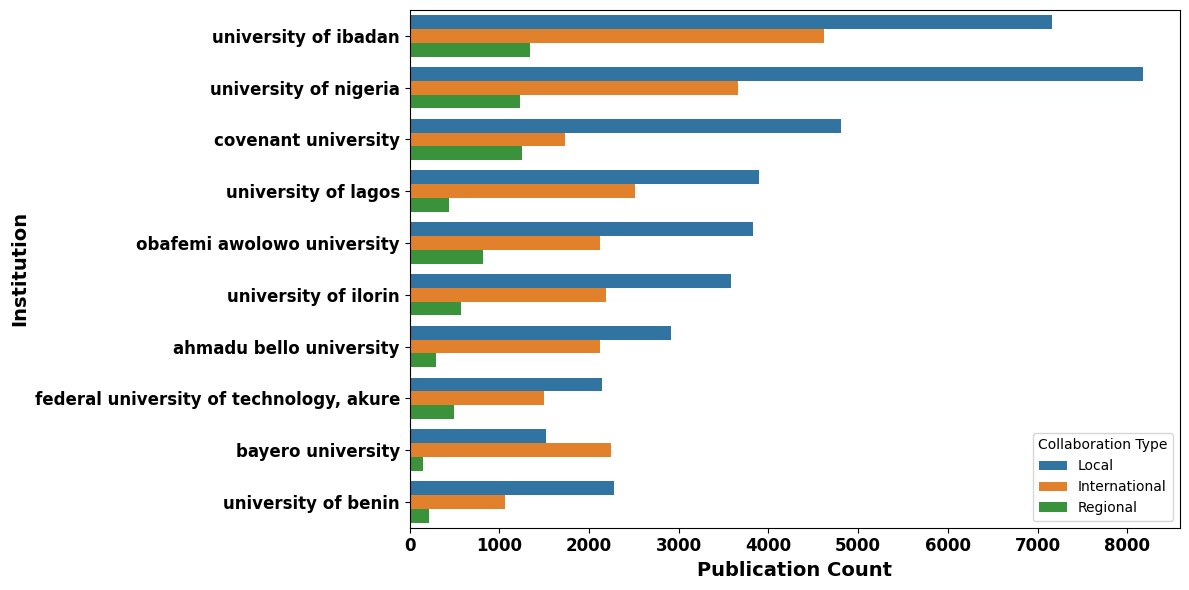

In [ ]:
# Visualize collaboration levels
plt.figure(figsize=(12, 6))
sns.barplot(y='Institutions involved', x='Count', hue='Collaboration Type', data=collaboration_by_institution)

# plt.title('Collaboration Levels by Institution', fontsize=16, fontweight='bold')  # Optional: Make title bigger and bolder

plt.ylabel('Institution', fontsize=14, fontweight='bold')  # Increase y-axis label size and make bold
plt.xlabel('Publication Count', fontsize=14, fontweight='bold')  # Increase x-axis label size and make bold

# Make tick labels bigger and bolder
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

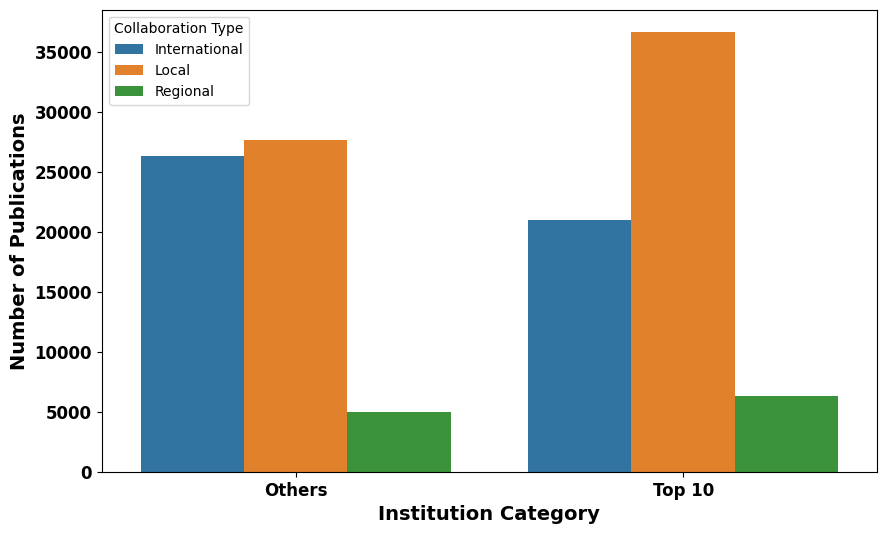

In [ ]:
# Calculate publication counts per institution
institution_counts = df_inst.groupby('Institutions involved')['Publication Count'].sum().sort_values(ascending=False)

# Get the top 10 institutions
top_10_institutions = institution_counts.head(10).index.tolist()

# Create a new column to categorize institutions
df_mainNg['Institution Category'] = df_mainNg['Institutions involved'].apply(lambda x: 'Top 10' if any(i in x for i in top_10_institutions) else 'Others')

# Group by institution category and collaboration type
df_collaboration = df_mainNg.groupby(['Institution Category', 'Collaboration Type'])['EID'].count().reset_index(name='Count')

# Visualize collaboration levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Institution Category', y='Count', hue='Collaboration Type', data=df_collaboration)
# plt.title('Collaboration Levels: Top 10 Institutions vs. Others')
plt.xlabel('Institution Category', fontsize=14, fontweight='bold')
plt.ylabel('Number of Publications', fontsize=14, fontweight='bold')

# Make tick labels bigger and bolder
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')


plt.show()

In [ ]:
# Group by institution category and collaboration type
df_pub_top10 = df_mainNg.groupby(['Institution Category'])['EID'].count().reset_index(name='Count')
df_pub_top10

,Institution Category,Count
0,Others,58918
1,Top 10,63953


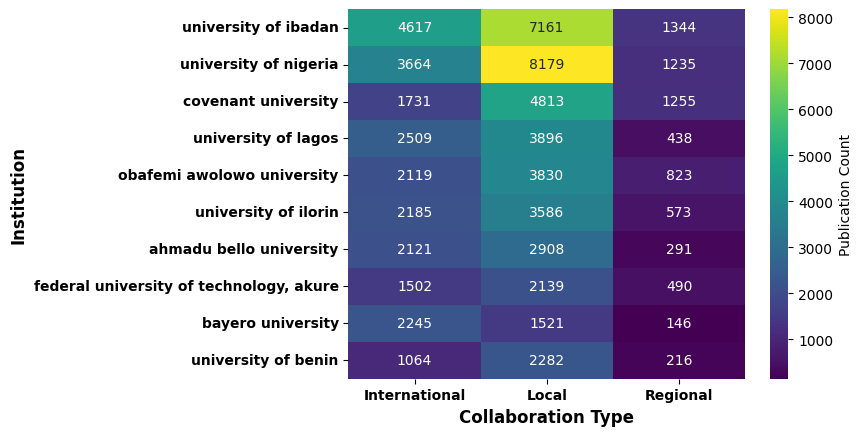

In [ ]:
# Group by institution and collaboration type, then count publications
heatmap_data = df_top_inst.groupby(['Institutions involved', 'Collaboration Type'])['EID'].count().reset_index(name='Count')

# Pivot the data for heatmap
heatmap_data = heatmap_data.pivot_table(index='Institutions involved', columns='Collaboration Type', values='Count', aggfunc='sum')

# Calculate total publication count for each institution
institution_totals = heatmap_data.sum(axis=1).sort_values(ascending=False)

# Reorder heatmap data based on total publication count
heatmap_data = heatmap_data.reindex(institution_totals.index)

# Create the heatmap with colorbar
ax = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Publication Count'})
# plt.title('Collaboration Types by Top 10 Institutions (Sorted)')
plt.xlabel('Collaboration Type', fontsize=12, fontweight='bold')
plt.ylabel('Institution', fontsize=12, fontweight='bold')

# Make tick labels bigger and bolder
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.show()

In [ ]:
# heatmap_data = heatmap_data.div(institution_totals, axis=0) * 100
heatmap_data

Collaboration Type,International,Local,Regional
Institutions involved,,,
university of ibadan,4617,7161,1344
university of nigeria,3664,8179,1235
covenant university,1731,4813,1255
university of lagos,2509,3896,438
obafemi awolowo university,2119,3830,823
university of ilorin,2185,3586,573
ahmadu bello university,2121,2908,291
"federal university of technology, akure",1502,2139,490
bayero university,2245,1521,146


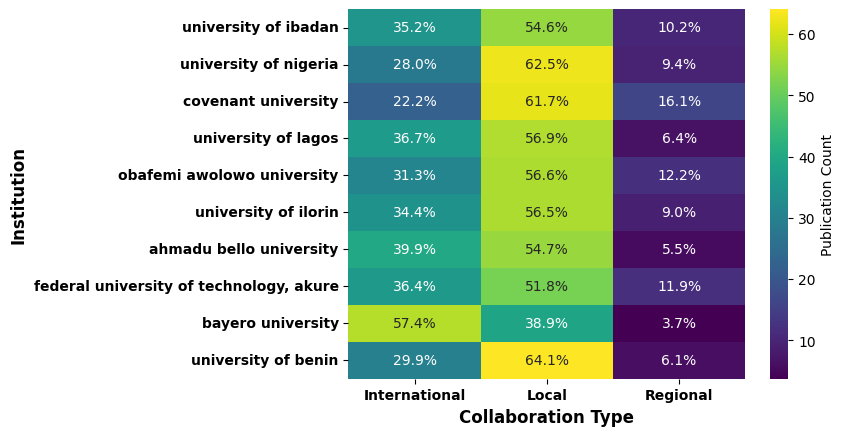

In [ ]:
# create a similar heatmap but this time as a percentage of the total

heatmap_data = heatmap_data.div(institution_totals, axis=0) * 100

heatmap_data = heatmap_data.fillna(0)

# Reorder heatmap data based on total publication count
heatmap_data = heatmap_data.reindex(institution_totals.index)

# Create the heatmap with colorbar
ax = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Publication Count'})

# Iterate through the heatmap cells to add percentage values as annotations
for t in ax.texts:
    text = t.get_text()  # Get the current text value
    if text != '0':  # Check if the value is not 0
        t.set_text(f'{float(text):.1f}%')  # Apply the percentage format

# plt.title('Collaboration Types by Top 10 Institutions (Percentage)')
plt.xlabel('Collaboration Type', fontsize=12, fontweight='bold')
plt.ylabel('Institution', fontsize=12, fontweight='bold')

# Make tick labels bigger and bolder
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.show()

**Features of Top 10 Institutions (Funding structure, Institution type)**

In [ ]:
# import institutons features from wikipedia
institutions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scopusWiki_affil.csv')
institutions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Institution name  310 non-null    object
 1   Abbreviation      310 non-null    object
 2   Funding           310 non-null    object
 3   Institution_type  310 non-null    object
 4   Alias             116 non-null    object
dtypes: object(5)
memory usage: 12.2+ KB


In [ ]:
df_inst_feat = df_mainNg.copy()
df_inst_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122871 entries, 0 to 122892
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        122871 non-null  object
 1   Authors with affiliations  122871 non-null  object
 2   Year                       122871 non-null  int64 
 3   DOI                        110052 non-null  object
 4   Document Type              122871 non-null  object
 5   Open Access                58723 non-null   object
 6   Discipline                 120650 non-null  object
 7   Countries involved         122871 non-null  object
 8   Region                     122871 non-null  object
 9   Collaboration Type         122871 non-null  object
 10  Institutions involved      122871 non-null  object
 11  OECD Class                 120650 non-null  object
 12  Institution Category       122871 non-null  object
dtypes: int64(1), object(12)
memory usage: 13.1+ MB


In [ ]:
# Convert 'Institutions involved' to list, handling various data types
df_inst_feat['Institutions involved'] = df_inst_feat['Institutions involved'].apply(
    lambda x: x if isinstance(x, list) else ([x] if isinstance(x, str) else [])  # Wrap in list if string, empty list otherwise
)

# Explode the 'Institutions involved' column
exploded_df = df_inst_feat.explode('Institutions involved')
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167979 entries, 0 to 122892
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        167979 non-null  object
 1   Authors with affiliations  167979 non-null  object
 2   Year                       167979 non-null  int64 
 3   DOI                        151530 non-null  object
 4   Document Type              167979 non-null  object
 5   Open Access                82314 non-null   object
 6   Discipline                 164891 non-null  object
 7   Countries involved         167979 non-null  object
 8   Region                     167979 non-null  object
 9   Collaboration Type         167979 non-null  object
 10  Institutions involved      152248 non-null  object
 11  OECD Class                 164891 non-null  object
 12  Institution Category       167979 non-null  object
dtypes: int64(1), object(12)
memory usage: 17.9+ MB


In [ ]:
# Convert 'Institution name' to lowercase for case-insensitive matching
institutions_df['Institution name'] = institutions_df['Institution name'].str.lower()

# join the institutions_df with df_all_inst on the Institution name in lower case
inst_exploded_df = exploded_df.merge(institutions_df, left_on='Institutions involved', right_on='Institution name', how='left')

# drop the Alias column
inst_exploded_df.drop(columns=['Alias'], inplace=True)

inst_exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167979 entries, 0 to 167978
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        167979 non-null  object
 1   Authors with affiliations  167979 non-null  object
 2   Year                       167979 non-null  int64 
 3   DOI                        151530 non-null  object
 4   Document Type              167979 non-null  object
 5   Open Access                82314 non-null   object
 6   Discipline                 164891 non-null  object
 7   Countries involved         167979 non-null  object
 8   Region                     167979 non-null  object
 9   Collaboration Type         167979 non-null  object
 10  Institutions involved      152248 non-null  object
 11  OECD Class                 164891 non-null  object
 12  Institution Category       167979 non-null  object
 13  Institution name           152248 non-null  

In [ ]:
# number of unique institutions
inst_exploded_df['Institutions involved'].nunique()

236

In [ ]:
# exclude NaN in all the analysis moving forward
inst_exploded_df = inst_exploded_df.dropna(subset=['Institutions involved'])

# Get the top 10 institutions
top_10_institutions = inst_exploded_df['Institutions involved'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 institutions
filtered_inst_df = inst_exploded_df[inst_exploded_df['Institutions involved'].isin(top_10_institutions)]

# Group by 'Institution_type' and calculate the desired statistics
institution_type_stats = filtered_inst_df.groupby('Institution_type').agg(
    Total_Publication_Count=('EID', 'nunique'),  # Count EIDs for total publications
    Number_of_Institutions=('Institutions involved', 'nunique')  # Count unique institutions
).reset_index()

# Calculate the percentage of total publications for each institution type
institution_type_stats['Percentage'] = (institution_type_stats['Total_Publication_Count'] / institution_type_stats['Total_Publication_Count'].sum()) * 100

# Format the 'Percentage' column to 2 significant figures
institution_type_stats['Percentage'] = institution_type_stats['Percentage'].map('{:.2f}%'.format)

# Sort by Total Publication Count in descending order
institution_type_stats = institution_type_stats.sort_values(by='Total_Publication_Count', ascending=False)

# Display the table
institution_type_stats

,Institution_type,Total_Publication_Count,Number_of_Institutions,Percentage
0,University,63953,10,100.00%


In [ ]:
# group by funding type
funding_stats = filtered_inst_df.groupby('Funding').agg(
    Total_Publication_Count=('EID', 'nunique'),  # Count EIDs for total publications
    Number_of_Institutions=('Institutions involved', 'nunique')  # Count unique institutions
).reset_index()

funding_stats

,Funding,Total_Publication_Count,Number_of_Institutions
0,Federal,57516,9
1,Private,7799,1


**Discipline level Analysis**

'Mutidisciplinary' and 'Undefined' areas were excluded at this point since their number is negligible compared to the entire dataset.

In [ ]:
df_main = df_mainNg.copy()
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122871 entries, 0 to 122892
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        122871 non-null  object
 1   Authors with affiliations  122871 non-null  object
 2   Year                       122871 non-null  int64 
 3   DOI                        110052 non-null  object
 4   Document Type              122871 non-null  object
 5   Open Access                58723 non-null   object
 6   Discipline                 120650 non-null  object
 7   Countries involved         122871 non-null  object
 8   Region                     122871 non-null  object
 9   Collaboration Type         122871 non-null  object
 10  Institutions involved      122871 non-null  object
 11  OECD Class                 120650 non-null  object
 12  Institution Category       122871 non-null  object
dtypes: int64(1), object(12)
memory usage: 13.1+ MB


In [ ]:
# Count unique EIDs for Undefined
nonOECD = df_main[(df_main['OECD Class'] == 'Undefined')]['EID'].count()

# Count unique EIDs for other OECD classes
OECD = df_main[~df_main['OECD Class'].isin(['Undefined'])]['EID'].count()

print(f"Number of unique EIDs in Multidisciplinary and Undefined: {nonOECD}")
print(f"Number of unique EIDs in other OECD classes: {OECD}")

Number of unique EIDs in Multidisciplinary and Undefined: 4
Number of unique EIDs in other OECD classes: 122867


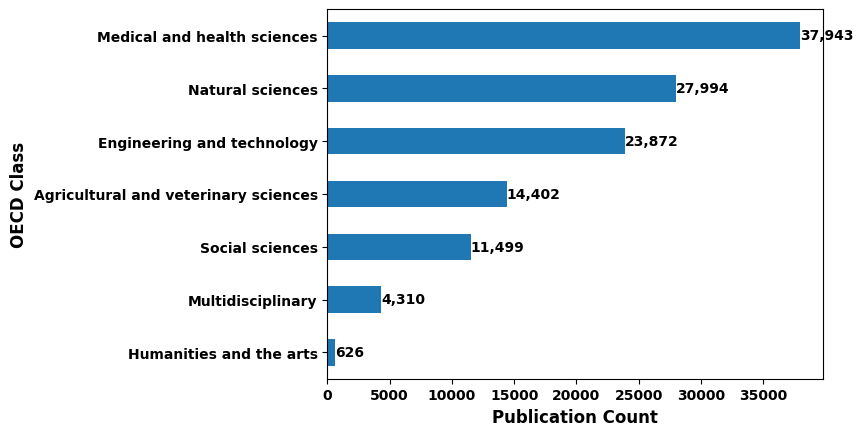

In [ ]:
# Filter data and group by 'OECD Class' to get counts
ex_nonOECD = df_main[(df_main['OECD Class'] != 'Undefined')].groupby('OECD Class')['EID'].nunique().sort_values(ascending=True)

# Create the horizontal bar chart
ax = ex_nonOECD.plot(kind='barh')  # Store the Axes object

# plt.title('Publication distribution by Discipline')
plt.xlabel('Publication Count', fontsize=12, fontweight='bold')
plt.ylabel('OECD Class', fontsize=12, fontweight='bold')

# Make tick labels bigger and bolder
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Display the count on each bar
for i, v in enumerate(ex_nonOECD):
    ax.text(v + 0.5, i, f'{v:,}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

In [ ]:
# Filter out 'Multidisciplinary' and 'Undefined'
filtered_df = df_main[(df_main['OECD Class'] != 'Undefined')]

# Group by discipline and year, and count publications
publications_by_discipline = filtered_df.groupby(['OECD Class', 'Year'])['EID'].count().reset_index(name='Publication Count')

# Calculate yearly growth rate
publications_by_discipline['Growth Rate'] = publications_by_discipline.groupby('OECD Class')['Publication Count'].pct_change() * 100

# pivot the table and print
publications_by_discipline_pivot = publications_by_discipline.pivot_table(index='Year', columns='OECD Class', values='Publication Count', fill_value=0).reset_index()
publications_by_discipline_pivot

OECD Class,Year,Agricultural and veterinary sciences,Engineering and technology,Humanities and the arts,Medical and health sciences,Multidisciplinary,Natural sciences,Social sciences
0,2014,907.0,1065.0,15.0,2431.0,83.0,1056.0,764.0
1,2015,835.0,1141.0,13.0,2348.0,79.0,1229.0,634.0
2,2016,1046.0,1353.0,11.0,2432.0,131.0,1582.0,709.0
3,2017,1164.0,1681.0,31.0,2550.0,130.0,1902.0,855.0
4,2018,1457.0,2178.0,29.0,2839.0,361.0,2330.0,895.0
5,2019,1492.0,3079.0,41.0,3318.0,407.0,3236.0,1101.0
6,2020,1670.0,2918.0,48.0,4840.0,769.0,3454.0,1386.0
7,2021,1928.0,3137.0,114.0,5511.0,763.0,4741.0,1647.0
8,2022,1987.0,3442.0,157.0,5747.0,704.0,4308.0,1696.0
9,2023,1916.0,3878.0,167.0,5927.0,883.0,4156.0,1812.0


In [ ]:
# Calculate CAGR per discipline
def calculate_cagr(df):
    return (df['Publication Count'].iloc[-1] / df['Publication Count'].iloc[0]) ** (1 / (len(df) - 1)) - 1

# apply function
cagr_per_discipline = publications_by_discipline.groupby('OECD Class').apply(calculate_cagr).reset_index(name='CAGR')
cagr_per_discipline

<ipython-input-79-5d810b0546be>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr_per_discipline = publications_by_discipline.groupby('OECD Class').apply(calculate_cagr).reset_index(name='CAGR')


,OECD Class,CAGR
0,Agricultural and veterinary sciences,0.086645
1,Engineering and technology,0.154415
2,Humanities and the arts,0.307048
3,Medical and health sciences,0.104093
4,Multidisciplinary,0.300463
5,Natural sciences,0.164427
6,Social sciences,0.100712


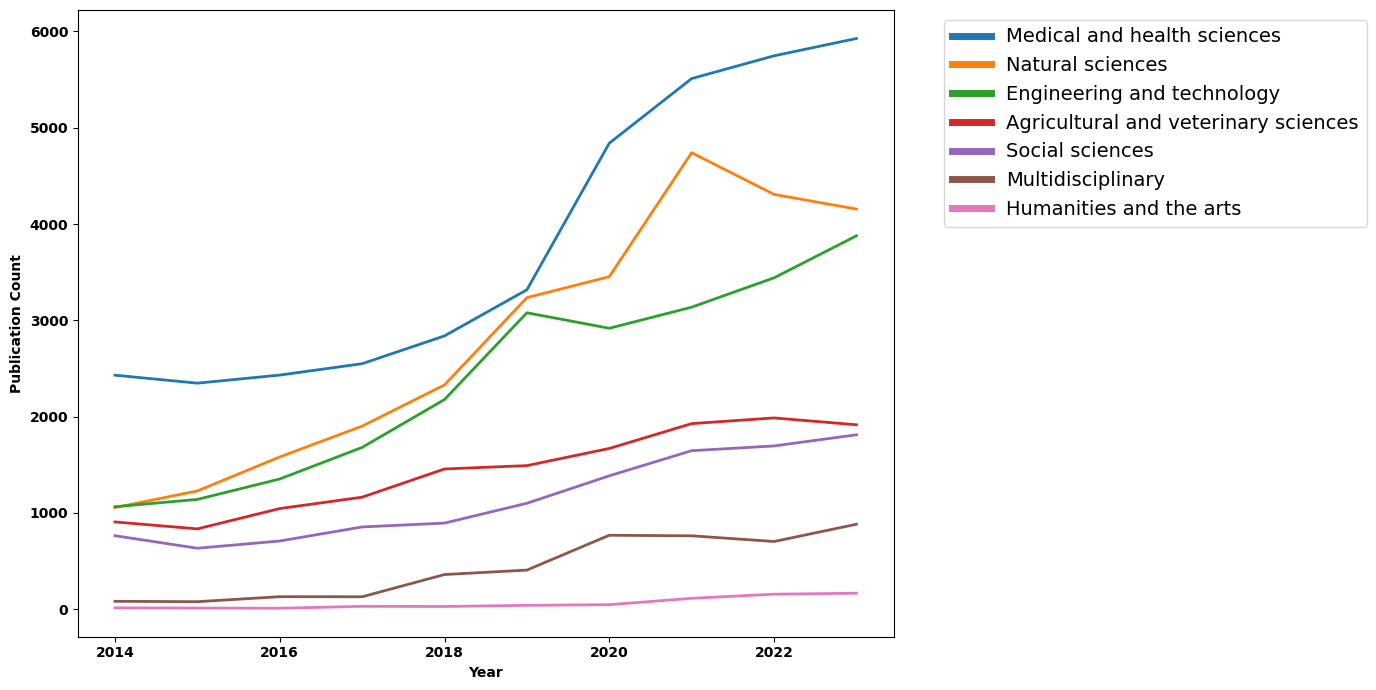

In [ ]:
# Aggregate publication counts per discipline
discipline_counts = publications_by_discipline.groupby('OECD Class')['Publication Count'].sum().sort_values(ascending=False)

# Get the order of disciplines based on total publication count
hue_order = discipline_counts.index.tolist()

# Set font weight and line width
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 2  # Adjust the value as needed

plt.figure(figsize=(14, 7))
sns.lineplot(data=publications_by_discipline, x='Year', y='Publication Count', hue='OECD Class', hue_order=hue_order)
# plt.title('Publication Trends by Discipline')
plt.xlabel('Year')
plt.ylabel('Publication Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Make legend lines thicker
handles, labels = ax.get_legend_handles_labels()
for line in handles:
    line.set_linewidth(5)  # Adjust line thickness as needed
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()



In [ ]:
# visualize publication by discipline by collaboration type
publications_by_discipline = filtered_df.groupby(['OECD Class', 'Collaboration Type'])
publication_counts = publications_by_discipline['EID'].count().reset_index(name='Publication Count')

# pivot into a dataframe
publication_counts = publication_counts.pivot_table(index='OECD Class', columns='Collaboration Type', values='Publication Count', fill_value=0).reset_index()

# Sort by total publication count across all collaboration types
publication_counts['Total'] = publication_counts.iloc[:, 1:].sum(axis=1)  # Sum across collaboration type columns
publication_counts.sort_values(by=['Total'], ascending=False, inplace=True)  # Sort by the 'Total' column
publication_counts = publication_counts.drop(columns=['Total'])  # Drop the temporary 'Total' column
publication_counts

Collaboration Type,OECD Class,International,Local,Regional
3,Medical and health sciences,15980.0,19426.0,2537.0
5,Natural sciences,10216.0,15024.0,2754.0
1,Engineering and technology,9552.0,11803.0,2517.0
0,Agricultural and veterinary sciences,5381.0,7566.0,1455.0
6,Social sciences,3051.0,7361.0,1087.0
4,Multidisciplinary,1720.0,2105.0,485.0
2,Humanities and the arts,372.0,186.0,68.0


<ipython-input-50-5adf8a5f2fed>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


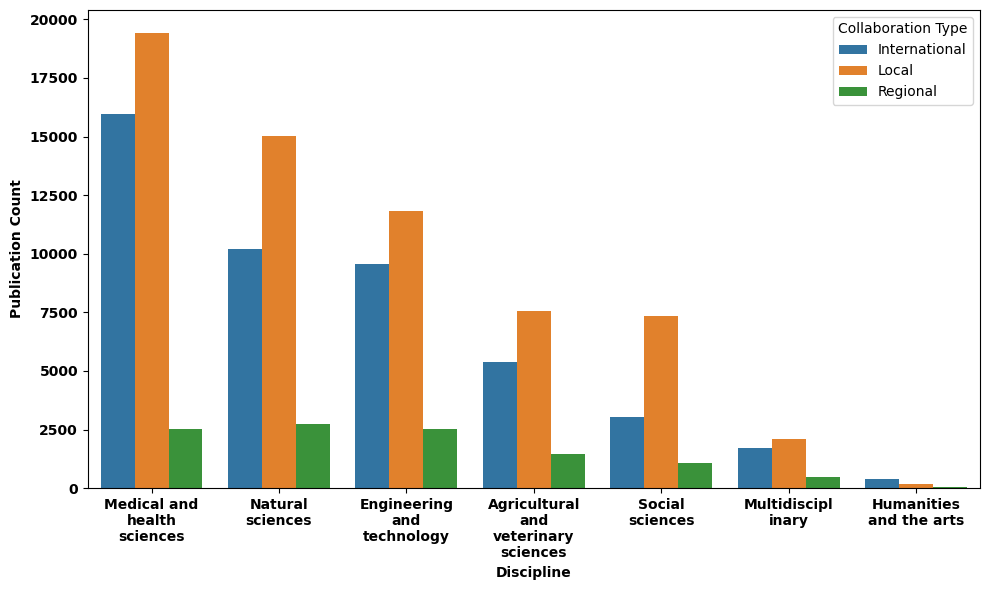

In [ ]:
# Melt the DataFrame to convert it to long format
publication_counts_melted = pd.melt(publication_counts, id_vars=['OECD Class'], var_name='Collaboration Type', value_name='Publication Count')

# Create the chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='OECD Class', y='Publication Count', hue='Collaboration Type', data=publication_counts_melted)  # Use the melted DataFrame
# plt.title('Publication Count by Discipline and Collaboration Type')
plt.xlabel('Discipline')
plt.ylabel('Publication Count')

# Wrap x-axis labels
labels = [textwrap.fill(label.get_text(), width=12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

**Discipline by Institution**

In [ ]:
inst_exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152248 entries, 0 to 167977
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        152248 non-null  object
 1   Authors with affiliations  152248 non-null  object
 2   Year                       152248 non-null  int64 
 3   DOI                        137483 non-null  object
 4   Document Type              152248 non-null  object
 5   Open Access                74845 non-null   object
 6   Discipline                 149351 non-null  object
 7   Countries involved         152248 non-null  object
 8   Region                     152248 non-null  object
 9   Collaboration Type         152248 non-null  object
 10  Institutions involved      152248 non-null  object
 11  OECD Class                 149351 non-null  object
 12  Institution Category       152248 non-null  object
 13  Institution name           152248 non-null  objec

In [ ]:
# Group by institution and discipline, and count publications
publications_by_inst_disc = inst_exploded_df.groupby(['Institutions involved', 'OECD Class'])['EID'].count().reset_index(name='Publication Count')

# Get the top 10 institutions
top_10_institutions = publications_by_inst_disc.groupby('Institutions involved')['Publication Count'].sum().sort_values(ascending=False).head(10).index

# Filter for top 10 institutions
filtered_publications = publications_by_inst_disc[publications_by_inst_disc['Institutions involved'].isin(top_10_institutions)]

# Exclude 'Undefined'
filtered_publications = filtered_publications[
    ~filtered_publications["OECD Class"].isin(["Undefined"])
]

# Function to clean institution names
def clean_institution_name(name):
    # Remove brackets and quotes
    name = name.replace("[", "").replace("]", "").replace("'", "")
    return name

# Apply the cleaning function to the 'Institutions' column
filtered_publications["Institutions involved"] = filtered_publications["Institutions involved"].apply(
    clean_institution_name
)

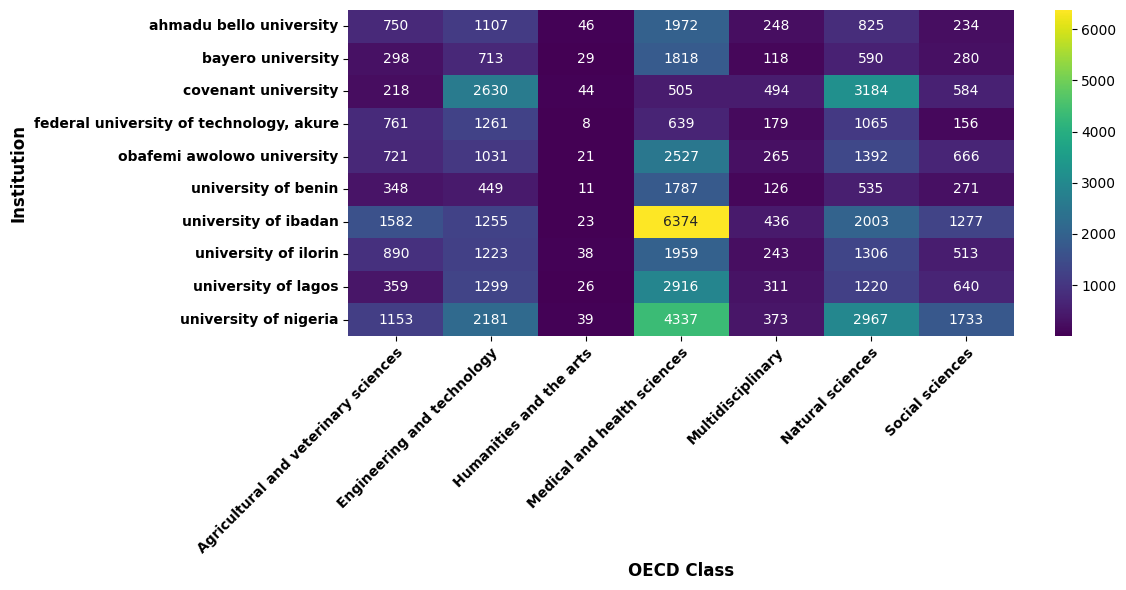

In [ ]:
# Exclude blank institutions
filtered_publications = filtered_publications[filtered_publications["Institutions involved"] != ""]

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_publications.pivot_table(index='Institutions involved', columns='OECD Class', values='Publication Count', fill_value=0), annot=True, cmap='viridis', fmt='g')
# plt.title('Publication Distribution by Top 10 Institutions and Discipline')
plt.xlabel('OECD Class', fontsize=12)
plt.ylabel('Institution', fontsize=12)

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Wrap x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# rotation=45: Rotates labels by 45 degrees
# ha='right': Aligns labels to the right
# rotation_mode='anchor': Rotates labels around their anchor point

plt.tight_layout()  # Adjust layout to prevent labels from being cut off

plt.show()

In [ ]:
# pivot filtered_publications
filtered_publications_pivot_df = filtered_publications.pivot_table(
    index="Institutions involved", columns="OECD Class", values="Publication Count", fill_value=0
)

filtered_publications_pivot_df

OECD Class,Agricultural and veterinary sciences,Engineering and technology,Humanities and the arts,Medical and health sciences,Multidisciplinary,Natural sciences,Social sciences
Institutions involved,,,,,,,
ahmadu bello university,750.0,1107.0,46.0,1972.0,248.0,825.0,234.0
bayero university,298.0,713.0,29.0,1818.0,118.0,590.0,280.0
covenant university,218.0,2630.0,44.0,505.0,494.0,3184.0,584.0
"federal university of technology, akure",761.0,1261.0,8.0,639.0,179.0,1065.0,156.0
obafemi awolowo university,721.0,1031.0,21.0,2527.0,265.0,1392.0,666.0
university of benin,348.0,449.0,11.0,1787.0,126.0,535.0,271.0
university of ibadan,1582.0,1255.0,23.0,6374.0,436.0,2003.0,1277.0
university of ilorin,890.0,1223.0,38.0,1959.0,243.0,1306.0,513.0
university of lagos,359.0,1299.0,26.0,2916.0,311.0,1220.0,640.0


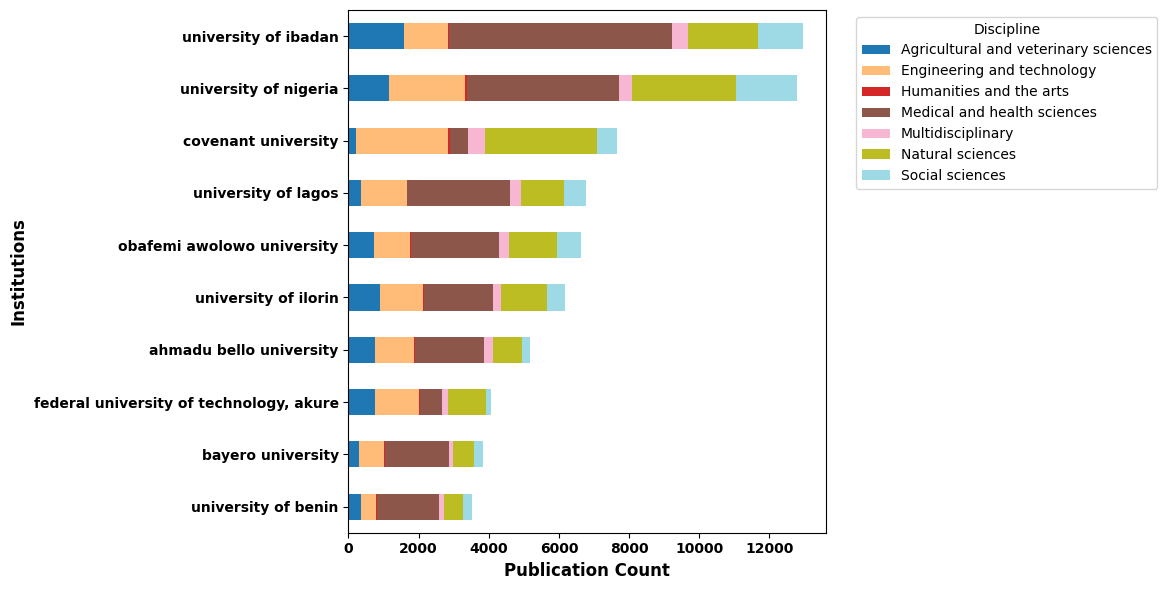

In [ ]:
# Pivot the data for stacked bar chart
pivot_df = filtered_publications.pivot_table(
    index="Institutions involved", columns="OECD Class", values="Publication Count", fill_value=0
)

# Pivot the data for stacked bar chart
pivot_df = filtered_publications.pivot_table(
    index="Institutions involved", columns="OECD Class", values="Publication Count", fill_value=0
)

# Sort institutions by total publication count (descending)
pivot_df['Total'] = pivot_df.sum(axis=1)  # Create a 'Total' column for sorting
pivot_df = pivot_df.sort_values(by=['Total'], ascending=True)
pivot_df = pivot_df.drop(columns=['Total']) # Drop the Total column

# Create the stacked horizontal bar chart
pivot_df.plot(kind="barh", stacked=True, figsize=(12, 6), colormap= 'tab20')

# Add labels and title
plt.xlabel("Publication Count", fontsize=12)
plt.ylabel("Institutions", fontsize=12)
# plt.title("Publication Distribution by Top 10 Institutions and Discipline")
plt.legend(title="Discipline", bbox_to_anchor=(1.05, 1), loc="upper left")

# Make axis numbers bold
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

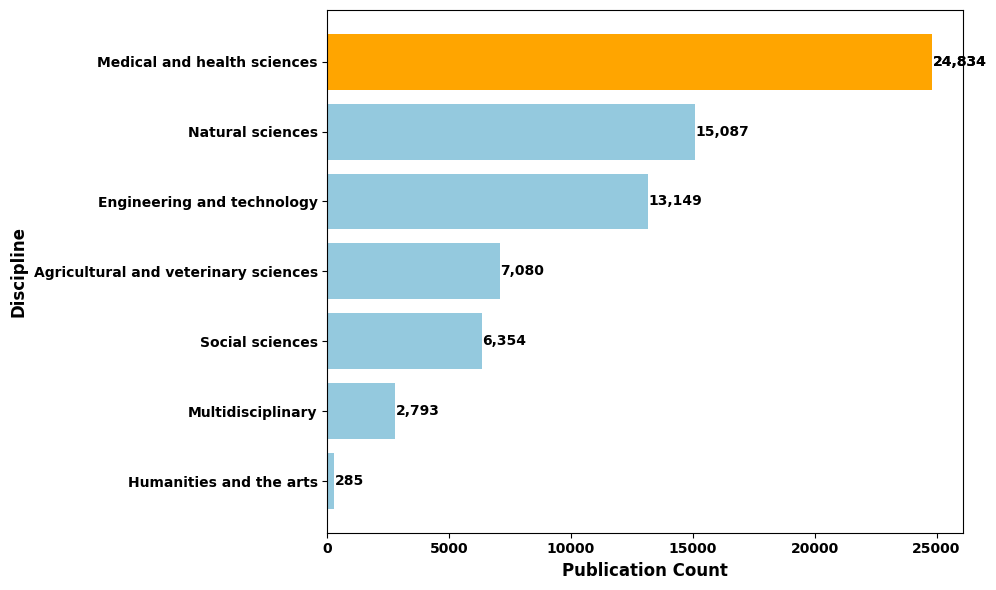

In [ ]:
# Exclude 'Undefined' BEFORE further calculations
filtered_publications = filtered_publications[~filtered_publications['OECD Class'].isin(['Undefined'])]

# Aggregate by discipline and sum publication counts
discipline_counts = filtered_publications.groupby('OECD Class')['Publication Count'].sum().sort_values(ascending=False)

# Get the most prominent discipline
most_prominent_discipline = discipline_counts.index[0]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=discipline_counts.index, x=discipline_counts.values, color='skyblue', orient='h')

# Highlight the most prominent discipline
plt.barh(most_prominent_discipline, discipline_counts[most_prominent_discipline], color='orange')

# Add labels and title
plt.ylabel('Discipline', fontsize = 12, fontweight ='bold')
plt.xlabel('Publication Count', fontsize = 12, fontweight ='bold')
# plt.title('Most Prominent Discipline among Top Institutions')
plt.yticks(rotation=0, ha='right')

# Make axis numbers bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')


# Add count labels to bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10,  # Adjust position to the right of the bar
             p.get_y() + p.get_height() / 2,  # Center vertically
             f'{width:,.0f}',  # Format the count
             ha='left', va='center', fontsize=10, fontweight='bold')  # Alignment and font properties

plt.tight_layout()
plt.show()

**Advanced Collaboration and Productivity metrics**

In [ ]:
# import main 2014 - 2023 data
# df_main1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scopus Downloads/scopus_2014-23.csv')
df_main1 = df_main.copy()
df_main1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122871 entries, 0 to 122892
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   EID                        122871 non-null  object
 1   Authors with affiliations  122871 non-null  object
 2   Year                       122871 non-null  int64 
 3   DOI                        110052 non-null  object
 4   Document Type              122871 non-null  object
 5   Open Access                58723 non-null   object
 6   Discipline                 120650 non-null  object
 7   Countries involved         122871 non-null  object
 8   Region                     122871 non-null  object
 9   Collaboration Type         122871 non-null  object
 10  Institutions involved      122871 non-null  object
 11  OECD Class                 120650 non-null  object
 12  Institution Category       122871 non-null  object
dtypes: int64(1), object(12)
memory usage: 13.1+ MB


**Collaboration Metrics**

* CI (Collaboration Index): The average number of
authors per paper.

* CI = Total number of authors / Total number of publications


* DC (Degree of Collaboration): The proportion of multi-authored papers.

* DC = (Total number of publications with more than one author) / (Total number of publications)


* CC (Collaboration Coefficient): As defined previously:

* CC = (Σ (ni^2) - N) / (N * (N - 1))


* MCC (Modified Collaboration Coefficient):

* MCC = (Σ (ni^2) - N) / (N^2 - Σ (ni))

In [ ]:
# Count the number of authors for each publication
df_main['Author Count'] = df_main['Authors with affiliations'].str.split(';').str.len()

# Group by year and author count, then aggregate
yearly_collaboration = df_main.groupby(['Year', 'Author Count'])['EID'].count().reset_index(name='Publication Count')

# Pivot the table for better visualization
yearly_collaboration_df = yearly_collaboration.pivot(index='Author Count', columns='Year', values='Publication Count').fillna(0)

# Display the table
yearly_collaboration_df

# yearly_collaboration_df.to_csv('/content/drive/MyDrive/Colab Notebooks/yearly_collaboration_level.csv', index=True)

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Author Count,,,,,,,,,,
1,904.0,836.0,891.0,959.0,1007.0,1199.0,1445.0,1651.0,1293.0,1339.0
2,1437.0,1288.0,1406.0,1489.0,1702.0,2173.0,2392.0,2568.0,2270.0,2477.0
3,1359.0,1434.0,1602.0,1706.0,2078.0,2594.0,3014.0,3189.0,2978.0,2975.0
4,981.0,1005.0,1188.0,1447.0,1764.0,2254.0,2571.0,2931.0,3044.0,3014.0
5,638.0,616.0,752.0,936.0,1199.0,1626.0,1823.0,2171.0,2318.0,2390.0
...,...,...,...,...,...,...,...,...,...,...
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
747,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def colabo_metrics(df):
    # Calculate CI
    total_authors = df['Authors with affiliations'].str.split(';').str.len().sum()
    total_publications = len(df)
    CI = total_authors / total_publications

    # Calculate DC
    multi_authored_publications = df[df['Authors with affiliations'].str.contains(';')].shape[0]
    DC = multi_authored_publications / total_publications

    # Calculate CC and MCC
    author_counts = df['Authors with affiliations'].str.split(';').str.len()
    N = total_authors
    sum_ni_squared = (author_counts ** 2).sum()
    sum_ni = author_counts.sum()

    CC = (sum_ni_squared - N) / (N * (N - 1)) if N > 1 else 0  # Handle case where N <= 1
    MCC = (sum_ni_squared - N) / (N**2 - sum_ni) if (N**2 - sum_ni) != 0 else 0  # Handle case where denominator is 0

    return CI, DC, CC, MCC

# Group by year and apply the function
yearly_collabo_metrics = df_main.groupby('Year').apply(colabo_metrics).apply(pd.Series)
yearly_collabo_metrics.columns = ['CI', 'DC', 'CC', 'MCC']

yearly_collabo_metrics

<ipython-input-59-0363d2fc6886>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_collabo_metrics = df_main.groupby('Year').apply(colabo_metrics).apply(pd.Series)


,CI,DC,CC,MCC
Year,,,,
2014,4.504735,0.859649,0.001294,0.001294
2015,5.117519,0.869701,0.001865,0.001865
2016,5.538420,0.879464,0.002027,0.002027
2017,5.916903,0.886482,0.001569,0.001569
2018,5.697020,0.901928,0.001510,0.001510
2019,5.319806,0.907670,0.000831,0.000831
2020,5.483685,0.906260,0.000431,0.000431
2021,6.311397,0.908390,0.000597,0.000597
2022,6.523278,0.929263,0.000433,0.000433


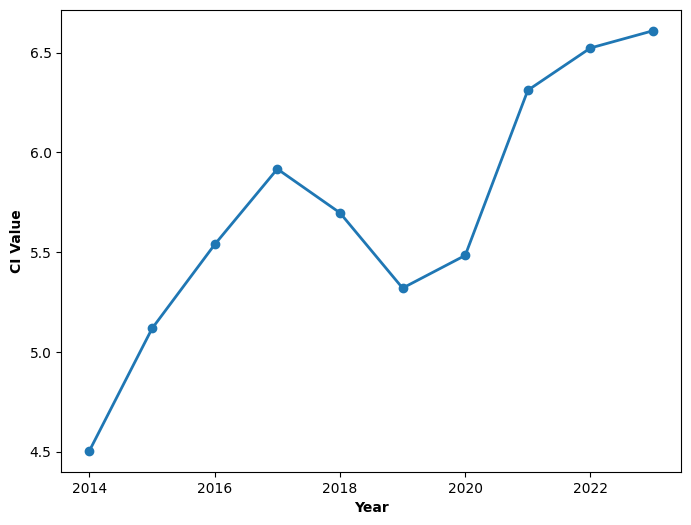

In [ ]:
# Plot for CI
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(yearly_collabo_metrics.index, yearly_collabo_metrics['CI'], marker='o')
# plt.title('Collaboration Index (CI)')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('CI Value', fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
# Plot for DC
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(yearly_collabo_metrics.index, yearly_collabo_metrics['DC'], marker='o')
# plt.title('Degree of Collaboration (DC)')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('DC Value', fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
# Plot for CC
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(yearly_collabo_metrics.index, yearly_collabo_metrics['CC'], marker='o')
# plt.title('Collaboration Coefficient (CC)')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('CC Value', fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
# Plot for MCC
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(yearly_collabo_metrics.index, yearly_collabo_metrics['MCC'], marker='o')
# plt.title('Modified Collaboration Coefficient (MCC)')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('MCC Value', fontweight='bold')
plt.grid(False)
plt.show()

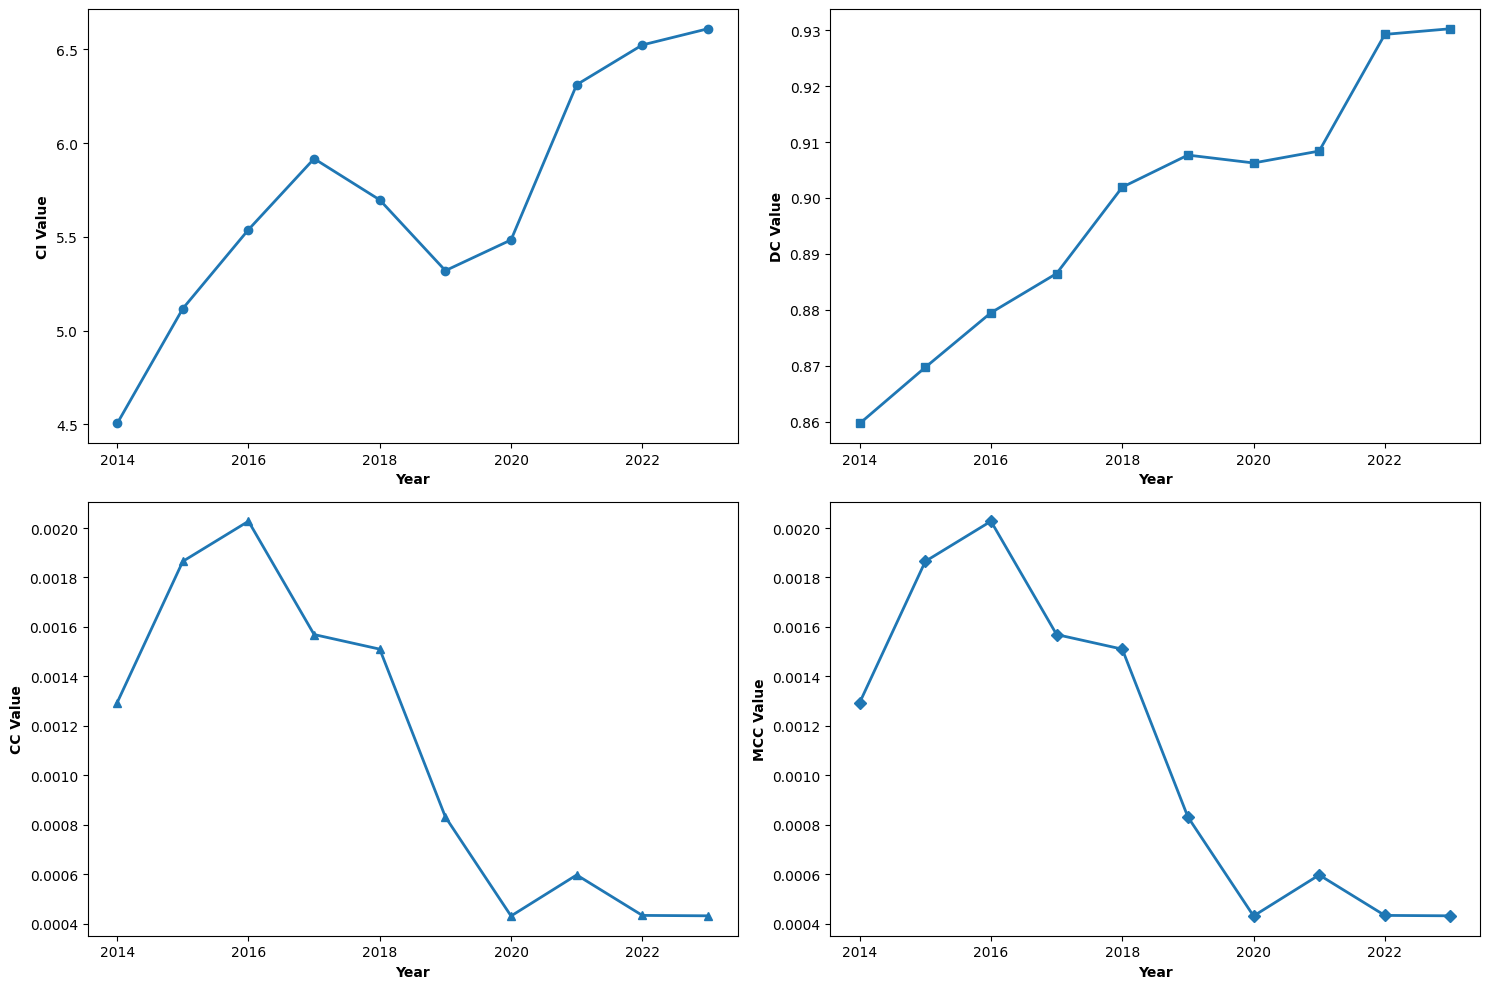

In [ ]:
# Create subplots with increased figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Increased figure size

# Plot CI
axes[0, 0].plot(yearly_collabo_metrics.index, yearly_collabo_metrics['CI'], marker='o')
# axes[0, 0].set_title('Collaboration Index (CI)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CI Value')
axes[0, 0].grid(False)  # Remove grid

# Plot DC
axes[0, 1].plot(yearly_collabo_metrics.index, yearly_collabo_metrics['DC'], marker='s')
# axes[0, 1].set_title('Degree of Collaboration (DC)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('DC Value')
axes[0, 1].grid(False)  # Remove grid

# Plot CC
axes[1, 0].plot(yearly_collabo_metrics.index, yearly_collabo_metrics['CC'], marker='^')
# axes[1, 0].set_title('Collaboration Coefficient (CC)')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('CC Value')
axes[1, 0].grid(False)  # Remove grid

# Plot MCC
axes[1, 1].plot(yearly_collabo_metrics.index, yearly_collabo_metrics['MCC'], marker='D')
# axes[1, 1].set_title('Modified Collaboration Coefficient (MCC)')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('MCC Value')
axes[1, 1].grid(False)  # Remove grid

# Adjust layout
plt.tight_layout()

# Display the charts
plt.show()

In [ ]:
# export this notebook as pdf
# !apt-get install texlive-xetex

# install pandoc
# !apt-get install pandoc
# !pip install pypandoc

!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Msc Proj.ipynb'
